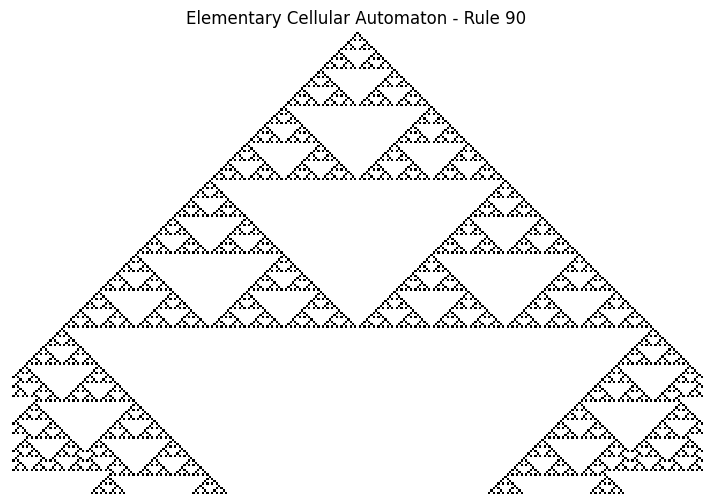

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Ρυθμίσεις προσομοίωσης
height = 400
width = 600
cellSize = 2
rows = height // cellSize
cols = width // cellSize
rulesetcode = 90  # Μπορείς να αλλάξεις τον κανόνα εδώ

# Αρχική κατάσταση: όλα 0, εκτός του κεντρικού κελιού
cells = [0] * cols
cells[cols // 2] = 1

# Μετατροπή κανόνα σε δυαδική μορφή
ruleset = list(f'{rulesetcode:08b}')
ruleset.reverse()

# Αποθήκευση όλων των γενεών
history = np.zeros((rows, cols), dtype=np.uint8)
history[0] = cells

# Συνάρτηση κανόνα
def rules(left, middle, right):
    idx = int(f'{left}{middle}{right}', 2)
    return int(ruleset[idx])

# Υπολογισμός όλων των γενεών
for gen in range(1, rows):
    newcells = []
    for i in range(cols):
        left = history[gen - 1][(i - 1) % cols]
        middle = history[gen - 1][i]
        right = history[gen - 1][(i + 1) % cols]
        newcells.append(rules(left, middle, right))
    history[gen] = newcells

# Σχεδίαση αποτελέσματος
plt.figure(figsize=(10, 6))
plt.imshow(history, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.title(f'Elementary Cellular Automaton - Rule {rulesetcode}')
plt.show()


In [9]:
max_rule_cycles = 5  # ή 10 αν θέλεις πιο πλούσια παρουσίαση


In [11]:
import pygame
import random
import time

# Simulation and Application Settings
height = 400
width = 600
cellSize = 2
generationTimestep = 10  # In ms
rulesetcode = 193  # Initial rule code
max_rule_cycles = 5  # Number of rule changes before exit

# Initialize the game engine
pygame.init()
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Cellular Automata Simulator")
clock = pygame.time.Clock()

# Initial cell configuration: all 0s with center cell as 1
cells = [0 for _ in range(width // cellSize)]
cells[len(cells) // 2] = 1

# Rule function: returns new cell state based on neighbors
def rules(left, middle, right):
    neighbourhood = [left, middle, right]
    ruleIndex = int(''.join(str(e) for e in neighbourhood), 2)
    ruleset = list('{0:08b}'.format(rulesetcode))
    ruleset.reverse()
    return int(ruleset[ruleIndex])

generation = 0
rule_cycles = 0
print("Current Rule: {0:d} ({0:08b})".format(rulesetcode))
screen.fill((255, 255, 255))
done = False

# Main loop
while not done and rule_cycles < max_rule_cycles:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True

    for i, cell in enumerate(cells):
        if cell == 1:
            if cellSize > 1:
                pygame.draw.rect(screen, (0, 0, 0), [i * cellSize, cellSize * generation, cellSize, cellSize])
            else:
                screen.set_at((i * cellSize, cellSize * generation), (0, 0, 0))

    # Calculate next generation
    newcells = []
    for i, cell in enumerate(cells):
        left = cells[(i - 1) % len(cells)]
        middle = cell
        right = cells[(i + 1) % len(cells)]
        newcells.append(rules(left, middle, right))
    cells = newcells

    if (cellSize * generation) >= height:
        rule_cycles += 1
        if rule_cycles >= max_rule_cycles:
            break  # Exit after the last cycle
        rulesetcode = random.randint(0, 255)
        generation = 0
        time.sleep(2)
        screen.fill((255, 255, 255))
        cells = [0 for _ in range(width // cellSize)]
        cells[len(cells) // 2] = 1
        print("Current Rule: {0:d} ({0:08b})".format(rulesetcode))
    else:
        pygame.display.update([0, cellSize * generation, width, cellSize])
        generation += 1

    clock.tick(1000 / generationTimestep)

pygame.quit()


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default


Current Rule: 193 (11000001)
Current Rule: 38 (00100110)
Current Rule: 196 (11000100)
Current Rule: 196 (11000100)
Current Rule: 45 (00101101)


In [8]:
import pygame
import random
import time

# Simulation And Application Settings
height = 400
width = 600
cellSize = 2
generationTimestep = 10  # In ms!
rulesetcode = 193  # This will be used initially

# Initialize the game engine
pygame.init()

# Set the height and width and title of the screen
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Cellular Automata Test")

# Loop until the user clicks the close button.
done = False
clock = pygame.time.Clock()

# Initial conditions for the cells. All 0 with center cell as 1
cells = [0 for e in range(width // cellSize)]
cells[len(cells) // 2] = 1

# This returns the new generation cell given a cell (middle) and its neighbours
def rules(left, middle, right):
    neighbourhood = [left, middle, right]
    ruleIndex = int(''.join(str(e) for e in neighbourhood), 2)
    ruleset = list('{0:08b}'.format(rulesetcode))
    ruleset.reverse()
    return int(ruleset[ruleIndex])

generation = 0
print("Current Rule: {0:d} ({0:08b})".format(rulesetcode))

# Initially set the screen to all white
screen.fill((255, 255, 255))

# Loop as long as done == False
while not done:
 
    for event in pygame.event.get():  # User did something
        if event.type == pygame.QUIT:  # If user clicked close
            done = True  # Flag that we are done so we exit this loop
    
    # Loop through the cells in the current generation drawing each
    for i, cell in enumerate(cells):
        if cell == 1:
            # If the cell size is a single pixel we can't use rect to draw it
            if cellSize > 1:
                pygame.draw.rect(screen, (0, 0, 0), [i*cellSize, cellSize*generation, cellSize, cellSize])
            else:
                screen.set_at((i*cellSize, cellSize*generation), (0, 0, 0))

    # Loop through the cells, grabbing its neighbours and calculate the subsequent generation
    newcells = []
    for i, cell in enumerate(cells):
        left = cells[(i - 1) % len(cells)]
        middle = cell
        right = cells[(i + 1) % len(cells)]
        newstate = rules(left, middle, right)
        newcells.append(newstate)
    cells = newcells

    # If we've filled the screen, pick a new rule and reset everything
    if (cellSize * generation) >= height:
        rulesetcode = random.randint(0, 255)
        generation = 0
        time.sleep(2)
        pygame.display.flip()
        screen.fill((255, 255, 255))
        cells = [0 for e in range(width // cellSize)]
        cells[len(cells) // 2] = 1
        print("Current Rule: {0:d} ({0:08b})".format(rulesetcode))
    else:            
        pygame.display.update([0, cellSize * generation, width, height])
        generation += 1

    clock.tick(1000 / generationTimestep)

# Be IDLE friendly
pygame.quit()


pygame 2.6.1 (SDL 2.28.4, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default


Current Rule: 193 (11000001)
Current Rule: 232 (11101000)
Current Rule: 113 (01110001)
Current Rule: 7 (00000111)
Current Rule: 165 (10100101)
Current Rule: 115 (01110011)
Current Rule: 52 (00110100)
Current Rule: 155 (10011011)
Current Rule: 95 (01011111)
Current Rule: 33 (00100001)
Current Rule: 131 (10000011)
Current Rule: 168 (10101000)
Current Rule: 80 (01010000)
Current Rule: 27 (00011011)
Current Rule: 42 (00101010)
Current Rule: 41 (00101001)
Current Rule: 115 (01110011)
Current Rule: 172 (10101100)
Current Rule: 4 (00000100)
Current Rule: 251 (11111011)
Current Rule: 147 (10010011)
Current Rule: 207 (11001111)
Current Rule: 41 (00101001)
Current Rule: 207 (11001111)
Current Rule: 47 (00101111)
Current Rule: 125 (01111101)
Current Rule: 36 (00100100)
Current Rule: 26 (00011010)
Current Rule: 82 (01010010)
Current Rule: 21 (00010101)
Current Rule: 26 (00011010)
Current Rule: 166 (10100110)
Current Rule: 217 (11011001)
Current Rule: 156 (10011100)
Current Rule: 103 (01100111)
Cur

KeyboardInterrupt: 

Τίτλος: Προσομοιωτής Απλού Κυτταρικού Αυτόματου με χρήση Python και Pygame

Εισαγωγή Στην παρούσα πτυχιακή εργασία παρουσιάζεται η δημιουργία ενός προσομοιωτή για τα απλά κυτταρικά αυτόματα (Elementary Cellular Automata) χρησιμοποιώντας τη γλώσσα προγραμματισμού Python και τη βιβλιοθήκη Pygame. Τα κυτταρικά αυτόματα είναι μια υπολογιστική μοντέλα που χρησιμοποιούνται για να μελετήσουν σύνθετες καταστάσεις μέσω απλών κανόνων, συχνά χρησιμοποιούμενα για την εξομοίωση φυσικών και βιολογικών συστημάτων.
Αυτό το έργο θα παρέχει μια εφαρμογή όπου ο χρήστης μπορεί να παρακολουθήσει την εξέλιξη ενός κυτταρικού αυτόματου και να πειραματιστεί με διαφορετικά σύνολα κανόνων και αρχικών συνθηκών.

Θεωρητική Βάση Τα κυτταρικά αυτόματα είναι μαθηματικά μοντέλα που αποτελούνται από έναν πίνακα κυττάρων, όπου κάθε κελί μπορεί να έχει μία από δύο ή περισσότερες καταστάσεις. Η κατάσταση ενός κυττάρου την επόμενη χρονική στιγμή εξαρτάται από την τρέχουσα κατάσταση του ίδιου του κυττάρου και των γειτονικών του κυττάρων.
Απλά Κυτταρικά Αυτόματα: Ένα απλό κυτταρικό αυτόματο χρησιμοποιεί τρεις γειτονικά κύτταρα για να υπολογίσει την επόμενη κατάσταση ενός κυττάρου. Αυτή η υπολογιστική διαδικασία περιγράφεται με ένα σύνολο κανόνων. Ένας από τους πιο διάσημους κανόνες είναι ο Rule 30, ο οποίος δημιουργεί πολύπλοκα και αναγνωρίσιμα μοτίβα από απλούς κανόνες.

Κανόνες Εξέλιξης: Στο πλαίσιο των κυτταρικών αυτομάτων, κάθε κανόνας καθορίζει την επόμενη κατάσταση του κυττάρου με βάση την τρέχουσα κατάσταση του κυττάρου και των δύο γειτονικών του κυττάρων. Αυτός ο κανόνας εκφράζεται μέσω ενός αριθμού 8-bit, ο οποίος καθορίζει πώς μεταβάλλεται η κατάσταση του κυττάρου με βάση την κατάσταση του και των γειτόνων του.

Περιγραφή του Κώδικα Ο κώδικας που ακολουθεί προσομοιώνει ένα απλό κυτταρικό αυτόματο χρησιμοποιώντας τη βιβλιοθήκη Pygame για την απεικόνιση των γενιών του αυτόματου. Ο πυρήνας του κώδικα είναι η συνάρτηση rules(), η οποία υπολογίζει την επόμενη κατάσταση του κάθε κυττάρου σε κάθε γενιά.
Αρχικές Συνθήκες:

Τα κύτταρα αρχικά είναι όλα ανενεργά (0) εκτός από το κεντρικό κελί το οποίο είναι ενεργό (1).

Συνάρτηση rules():

Η συνάρτηση αυτή παίρνει τις καταστάσεις ενός κυττάρου και των δύο γειτόνων του και υπολογίζει την επόμενη κατάσταση με βάση τον κανόνα εξέλιξης.

Ο κανόνας καθορίζεται από έναν ακέραιο αριθμό (π.χ. 90), ο οποίος μετατρέπεται σε μια δυαδική λίστα 8 bits. Κάθε συνδυασμός γειτονικών καταστάσεων αντιστοιχεί σε μια τιμή στο δυαδικό κανόνα.

Διαδικασία Προσομοίωσης:

Στην αρχή, μια γενιά κυττάρων δημιουργείται με βάση τις αρχικές συνθήκες.

Στη συνέχεια, για κάθε γενιά, υπολογίζεται η επόμενη γενιά και η νέα κατάσταση κάθε κυττάρου.

Οι γενιές εμφανίζονται στο παράθυρο της Pygame, ενώ η διαδικασία συνεχίζεται μέχρι να γεμίσει η οθόνη.

4. Ανάλυση των Αποτελεσμάτων
Κατά την εκτέλεση του προγράμματος, παρατηρούμε τις γενιές του κυτταρικού αυτόματου να αναπτύσσονται στην οθόνη, με την κάθε γενιά να απεικονίζεται ως μια νέα σειρά από κυτταρικά μοτίβα. Το μοτίβο αυτό εξαρτάται άμεσα από τον κανόνα εξέλιξης και τις αρχικές συνθήκες.

5. Συμπεράσματα και Βελτιώσεις
Το πρόγραμμα αυτό παρέχει μια οπτική αναπαράσταση του τρόπου λειτουργίας των απλών κυτταρικών αυτομάτων και των κανόνων εξέλιξής τους. Η εφαρμογή μπορεί να επεκταθεί με τη χρήση άλλων τύπων κυτταρικών αυτομάτων, όπως τα δύο-διάστατα ή πιο σύνθετα μοντέλα.